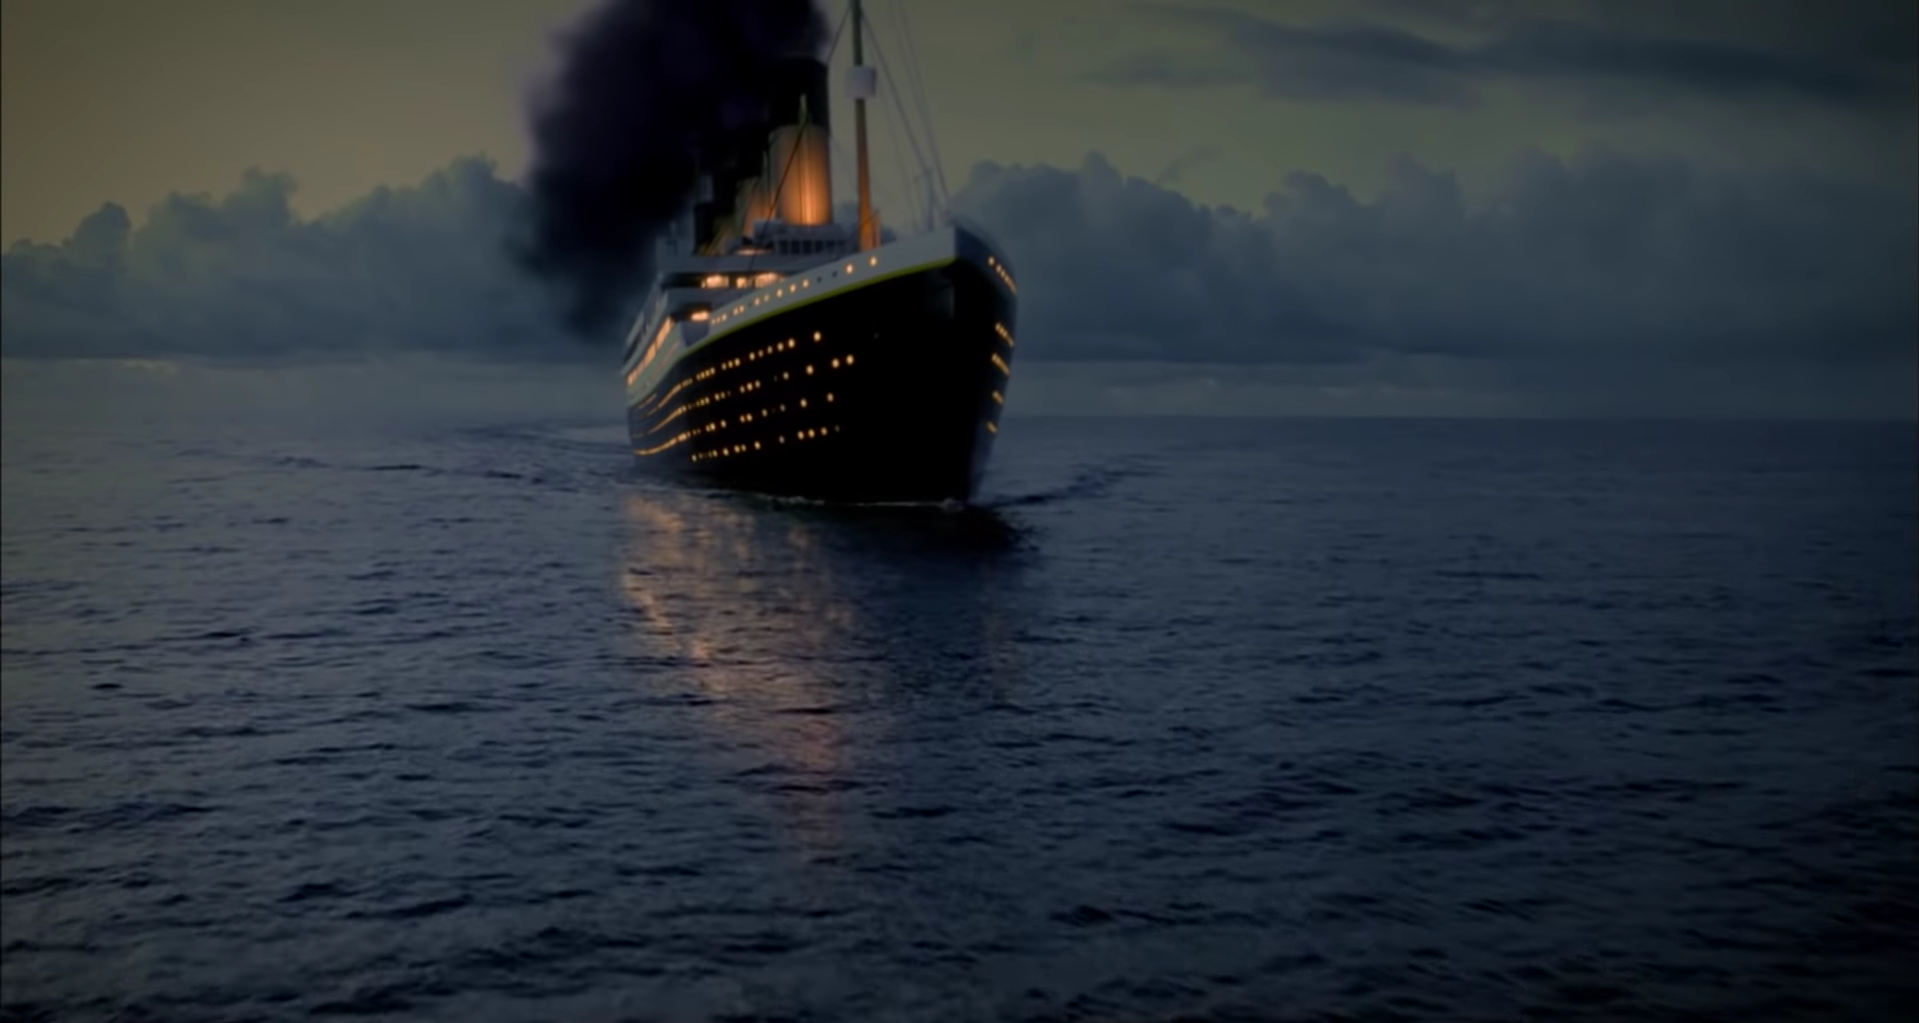

In [45]:
from IPython.display import Image
Image('...Path/', width=912)

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
Titan_Tr = pd.read_csv('...Path/train.csv')
Titan_Tt = pd.read_csv('...Path/test.csv')

Features_Data = pd.read_csv('...Path/gender_submission.csv')

In [48]:
Titan_Tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
print('Train-Data')
print(Titan_Tr.info())
print('------------')
print('Test-Data')
print(Titan_Tt.info())

Train-Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------
Test-Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId

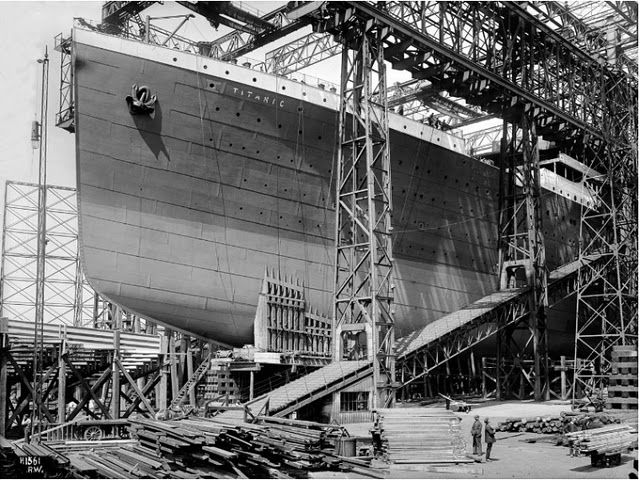

In [50]:
Image('...Path/', width=912)

In [51]:
Titan_Tr.drop(['PassengerId','Name','Ticket','Embarked'], axis=1, inplace=True)
Titan_Tt.drop(['PassengerId','Name','Ticket','Embarked'], axis=1, inplace=True)
Features_Data.drop(['PassengerId'], axis=1, inplace=True)

In [52]:
# The sum of null columns

print('Missing values in Train-Data')
print(Titan_Tr.isnull().sum())
print('-----------------------------')
print('Missing values in Test-Data')
print(Titan_Tt.isnull().sum())

Missing values in Train-Data
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64
-----------------------------
Missing values in Test-Data
Pclass      0
Sex         0
Age        86
SibSp       0
Parch       0
Fare        1
Cabin     327
dtype: int64


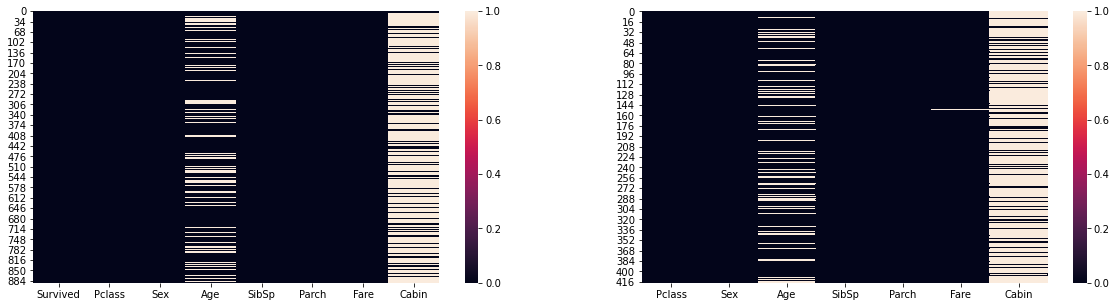

In [53]:
# Diagram, of null values in columns

fig, (x1, x2) = plt.subplots(1,2,figsize=(20,5))

sns.heatmap(Titan_Tr.isnull(), ax=x1)

sns.heatmap(Titan_Tt.isnull(), ax=x2)

plt.show()

<ipython-input-54-482a499a5861>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


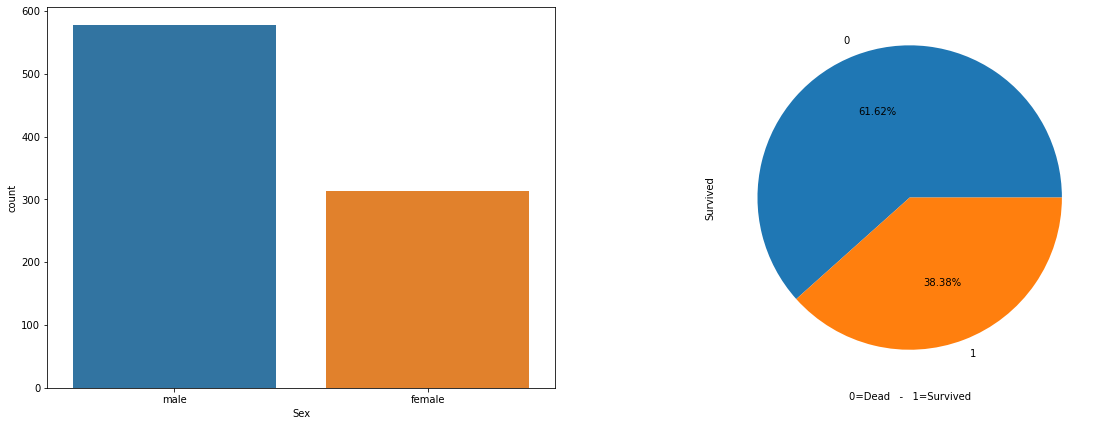

In [54]:
fig, (x1, x2) = plt.subplots(1,2, figsize=(20,7))

#Count of sex
sns.countplot(x='Sex', data=Titan_Tr, ax=x1)

#Diagram, wich percent survived
Titan_Tr['Survived'].value_counts().plot.pie(autopct='%1.2f%%', ax=x2)
plt.xlabel('0=Dead   -   1=Survived')

fig.show()

<ipython-input-55-a631f2495384>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


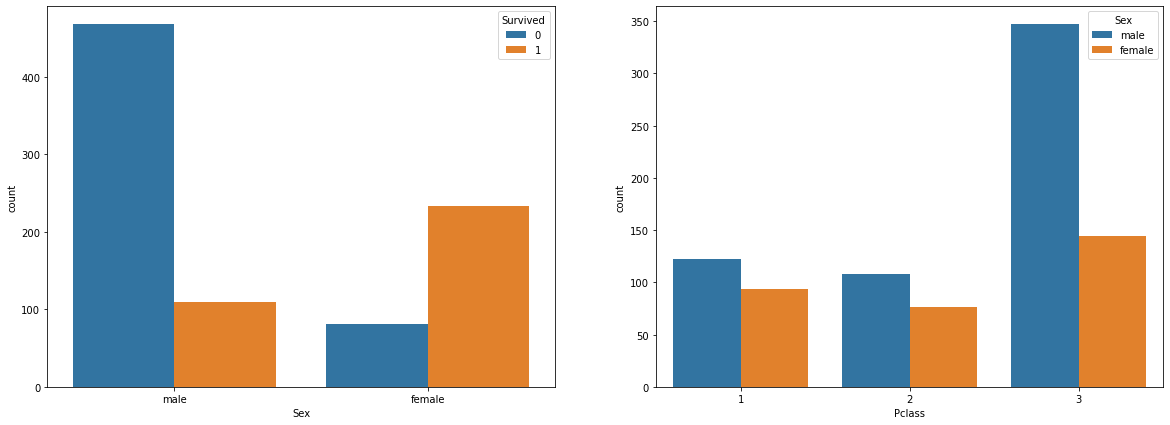

In [55]:
fig, (x1, x2) = plt.subplots(1,2, figsize=(20,7))

#The count of sex who survived
sns.countplot(x='Sex',
              hue='Survived',
              data=Titan_Tr,
              ax=x1)

#The count of Class who survived
sns.countplot(x='Pclass',
              hue='Sex',
              data=Titan_Tr,
              ax=x2)

# 0=Dead - 1=Survived
fig.show()

In [56]:
# The average of ages in class column from Train-Test-Data
print('Train-Data')
print(pd.pivot_table(Titan_Tr, index='Pclass', values='Age'))
print('--------------------')
print('Test-Data')
print(pd.pivot_table(Titan_Tt, index='Pclass', values='Age'))

Train-Data
              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620
--------------------
Test-Data
              Age
Pclass           
1       40.918367
2       28.777500
3       24.027945


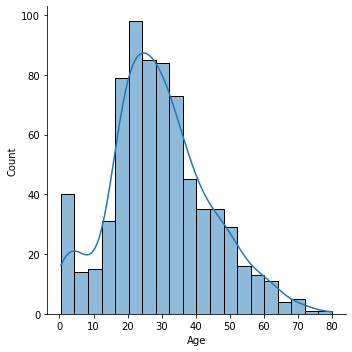

In [57]:
sns.displot(x='Age', data=Titan_Tr, kde=True)

In [58]:
#Missing values for Train-Test-Data

#For Train-Data
Titan_Tr['Age'].replace(np.nan, 0, inplace=True)
for i in range(len(Titan_Tr)):
    
    Class = Titan_Tr.iloc[i,(1)]
    Age = Titan_Tr.iloc[i,(3)]
    
    if( (Class == 1) and (Age == 0) ):
        Titan_Tr['Age'][i] = 38.0
    elif( (Class == 2) and (Age == 0) ):
        Titan_Tr['Age'][i] = 29.0
    elif( (Class == 3) and (Age == 0) ):
        Titan_Tr['Age'][i] = 25.0
        
        
        
#For Test_Data
Titan_Tt['Age'].replace(np.nan, 0, inplace=True)
for j in range(len(Titan_Tt)):
    
    Class = Titan_Tt.iloc[j,(0)]
    Age = Titan_Tt.iloc[j,(2)]
    
    if( (Class == 1) and (Age == 0) ):
        Titan_Tt['Age'][j] = 40.0    
    elif( (Class == 2) and (Age == 0) ):
        Titan_Tt['Age'][j] = 28.0
    elif( (Class == 3) and (Age == 0) ):
        Titan_Tt['Age'][j] = 24.0

<ipython-input-58-c2a088586540>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titan_Tr['Age'][i] = 25.0
<ipython-input-58-c2a088586540>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titan_Tr['Age'][i] = 29.0
<ipython-input-58-c2a088586540>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titan_Tr['Age'][i] = 38.0
<ipython-input-58-c2a088586540>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

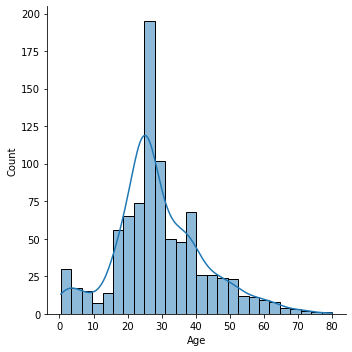

In [59]:
#New histogram[Age] from Train-Data 
sns.displot(x='Age', data=Titan_Tr, kde=True)

In [60]:
#Create a column Cabins in Train-Test-Data
Titan_Tr['Cabins'] = Titan_Tr['Pclass']
Titan_Tr.drop(['Cabin'], axis=1 , inplace=True)

Titan_Tt['Cabins'] = Titan_Tr['Pclass']
Titan_Tt.drop(['Cabin'], axis=1 , inplace=True)

In [61]:
#Total-Family = SibSp(Sibling) + Parch(Parents)

Titan_Tr['Total Family'] = Titan_Tr['SibSp'] + Titan_Tr['Parch']
Titan_Tr.drop(['SibSp','Parch'], axis=1, inplace=True)

Titan_Tt['Total Family'] = Titan_Tt['SibSp'] + Titan_Tt['Parch']
Titan_Tt.drop(['SibSp','Parch'], axis=1, inplace=True)

Titan_Tt.dropna(axis=0, inplace=True)

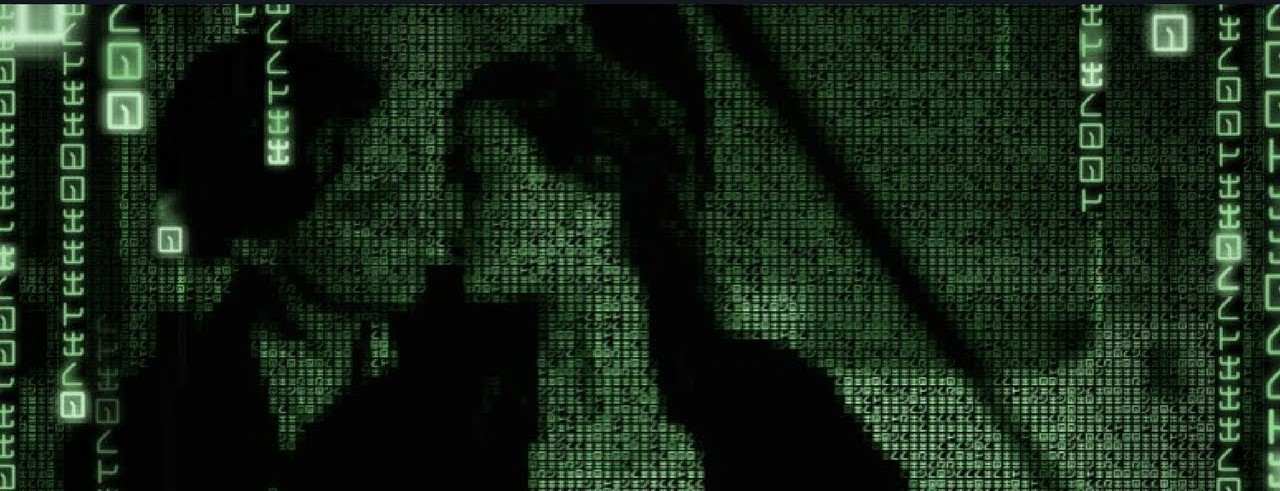

In [62]:
Image('...Path/', width=912)

In [63]:
print(Titan_Tr['Sex'].unique())

Sex = {'female':2 , 'male':1}

Titan_Tr['Sex'] = Titan_Tr['Sex'].map(Sex)
Titan_Tt['Sex'] = Titan_Tt['Sex'].map(Sex)

print(Titan_Tr['Sex'].unique())

['male' 'female']
[1 2]


In [64]:
#For Train-Data
for i in range(len(Titan_Tr)):
    
    Train_Age = Titan_Tr.iloc[i,(3)]
    
    if(Train_Age <= 18):
        Titan_Tr['Age'][i] = 0
    elif( (Train_Age > 18) and (Train_Age <= 30) ):
        Titan_Tr['Age'][i] = 1
    elif( (Train_Age > 30) and (Train_Age <=50) ):
        Titan_Tr['Age'][i] = 2
    else:
        Titan_Tr['Age'][i] = 3
        
        
        
#For Test-Data
for j in range(len(Titan_Tt)):
    
    Test_Age = Titan_Tt.iloc[j,(2)]
    
    if(Test_Age <= 18):
        Titan_Tt['Age'][j] = 0
    elif( (Test_Age > 18) and (Test_Age <= 30) ):
        Titan_Tt['Age'][j] = 1
    elif( (Test_Age > 30) and (Test_Age <=50) ):
        Titan_Tt['Age'][j] = 2
    else:
        Titan_Tt['Age'][j] = 3

<ipython-input-64-a8ddd6151089>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titan_Tr['Age'][i] = 1
<ipython-input-64-a8ddd6151089>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titan_Tr['Age'][i] = 2
<ipython-input-64-a8ddd6151089>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titan_Tr['Age'][i] = 3
<ipython-input-64-a8ddd6151089>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [65]:
#So, 50% of people leave in 3-Class

print('Train-Data')
print(pd.pivot_table(Titan_Tr, index='Pclass', values='Fare'))
print('--------------------')
print(Titan_Tr['Fare'].describe())
print('------------------------------------------------------')
print('Test-Data')
print(pd.pivot_table(Titan_Tt, index='Pclass', values='Fare'))
print('--------------------')
print(Titan_Tt['Fare'].describe())

Train-Data
             Fare
Pclass           
1       84.154687
2       20.662183
3       13.675550
--------------------
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
------------------------------------------------------
Test-Data
             Fare
Pclass           
1       94.280297
2       22.202104
3       12.459678
--------------------
count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


In [66]:
#For Train-Data
for i in range(len(Titan_Tr)):
    
    Train_Fare = Titan_Tr.iloc[i,(4)]
    
    if( (Train_Fare >= 0) and (Train_Fare <= 15) ):
        Titan_Tr['Fare'][i] = 0
    elif( (Train_Fare > 15) and (Train_Fare <= 31) ):
        Titan_Tr['Fare'][i] = 1
    else:
        Titan_Tr['Fare'][i] = 2
        
        
        
#For Test-Data
for j in range(len(Titan_Tt)):
    
    Test_Fare = Titan_Tt.iloc[j,(3)]
    
    if( (Test_Fare >= 0) and (Test_Fare <= 15) ):
        Titan_Tt['Fare'][j] = 0
    elif( (Test_Fare > 15) and (Test_Fare <=31) ):
        Titan_Tt['Fare'][j] = 1
    else:
        Titan_Tt['Fare'][j] = 2

<ipython-input-66-9f51b88e161d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titan_Tr['Fare'][i] = 0
<ipython-input-66-9f51b88e161d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titan_Tr['Fare'][i] = 2
<ipython-input-66-9f51b88e161d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titan_Tr['Fare'][i] = 1
<ipython-input-66-9f51b88e161d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [67]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()

Sc.fit_transform(Titan_Tr)

array([[-0.78927234,  0.82737724, -0.73769513, ..., -0.88305412,
         0.82737724,  0.05915988],
       [ 1.2669898 , -1.56610693,  1.35557354, ...,  1.51939236,
        -1.56610693,  0.05915988],
       [ 1.2669898 ,  0.82737724,  1.35557354, ..., -0.88305412,
         0.82737724, -0.56097483],
       ...,
       [-0.78927234,  0.82737724,  1.35557354, ...,  0.31816912,
         0.82737724,  1.29942929],
       [ 1.2669898 , -1.56610693, -0.73769513, ...,  0.31816912,
        -1.56610693, -0.56097483],
       [-0.78927234,  0.82737724, -0.73769513, ..., -0.88305412,
         0.82737724, -0.56097483]])

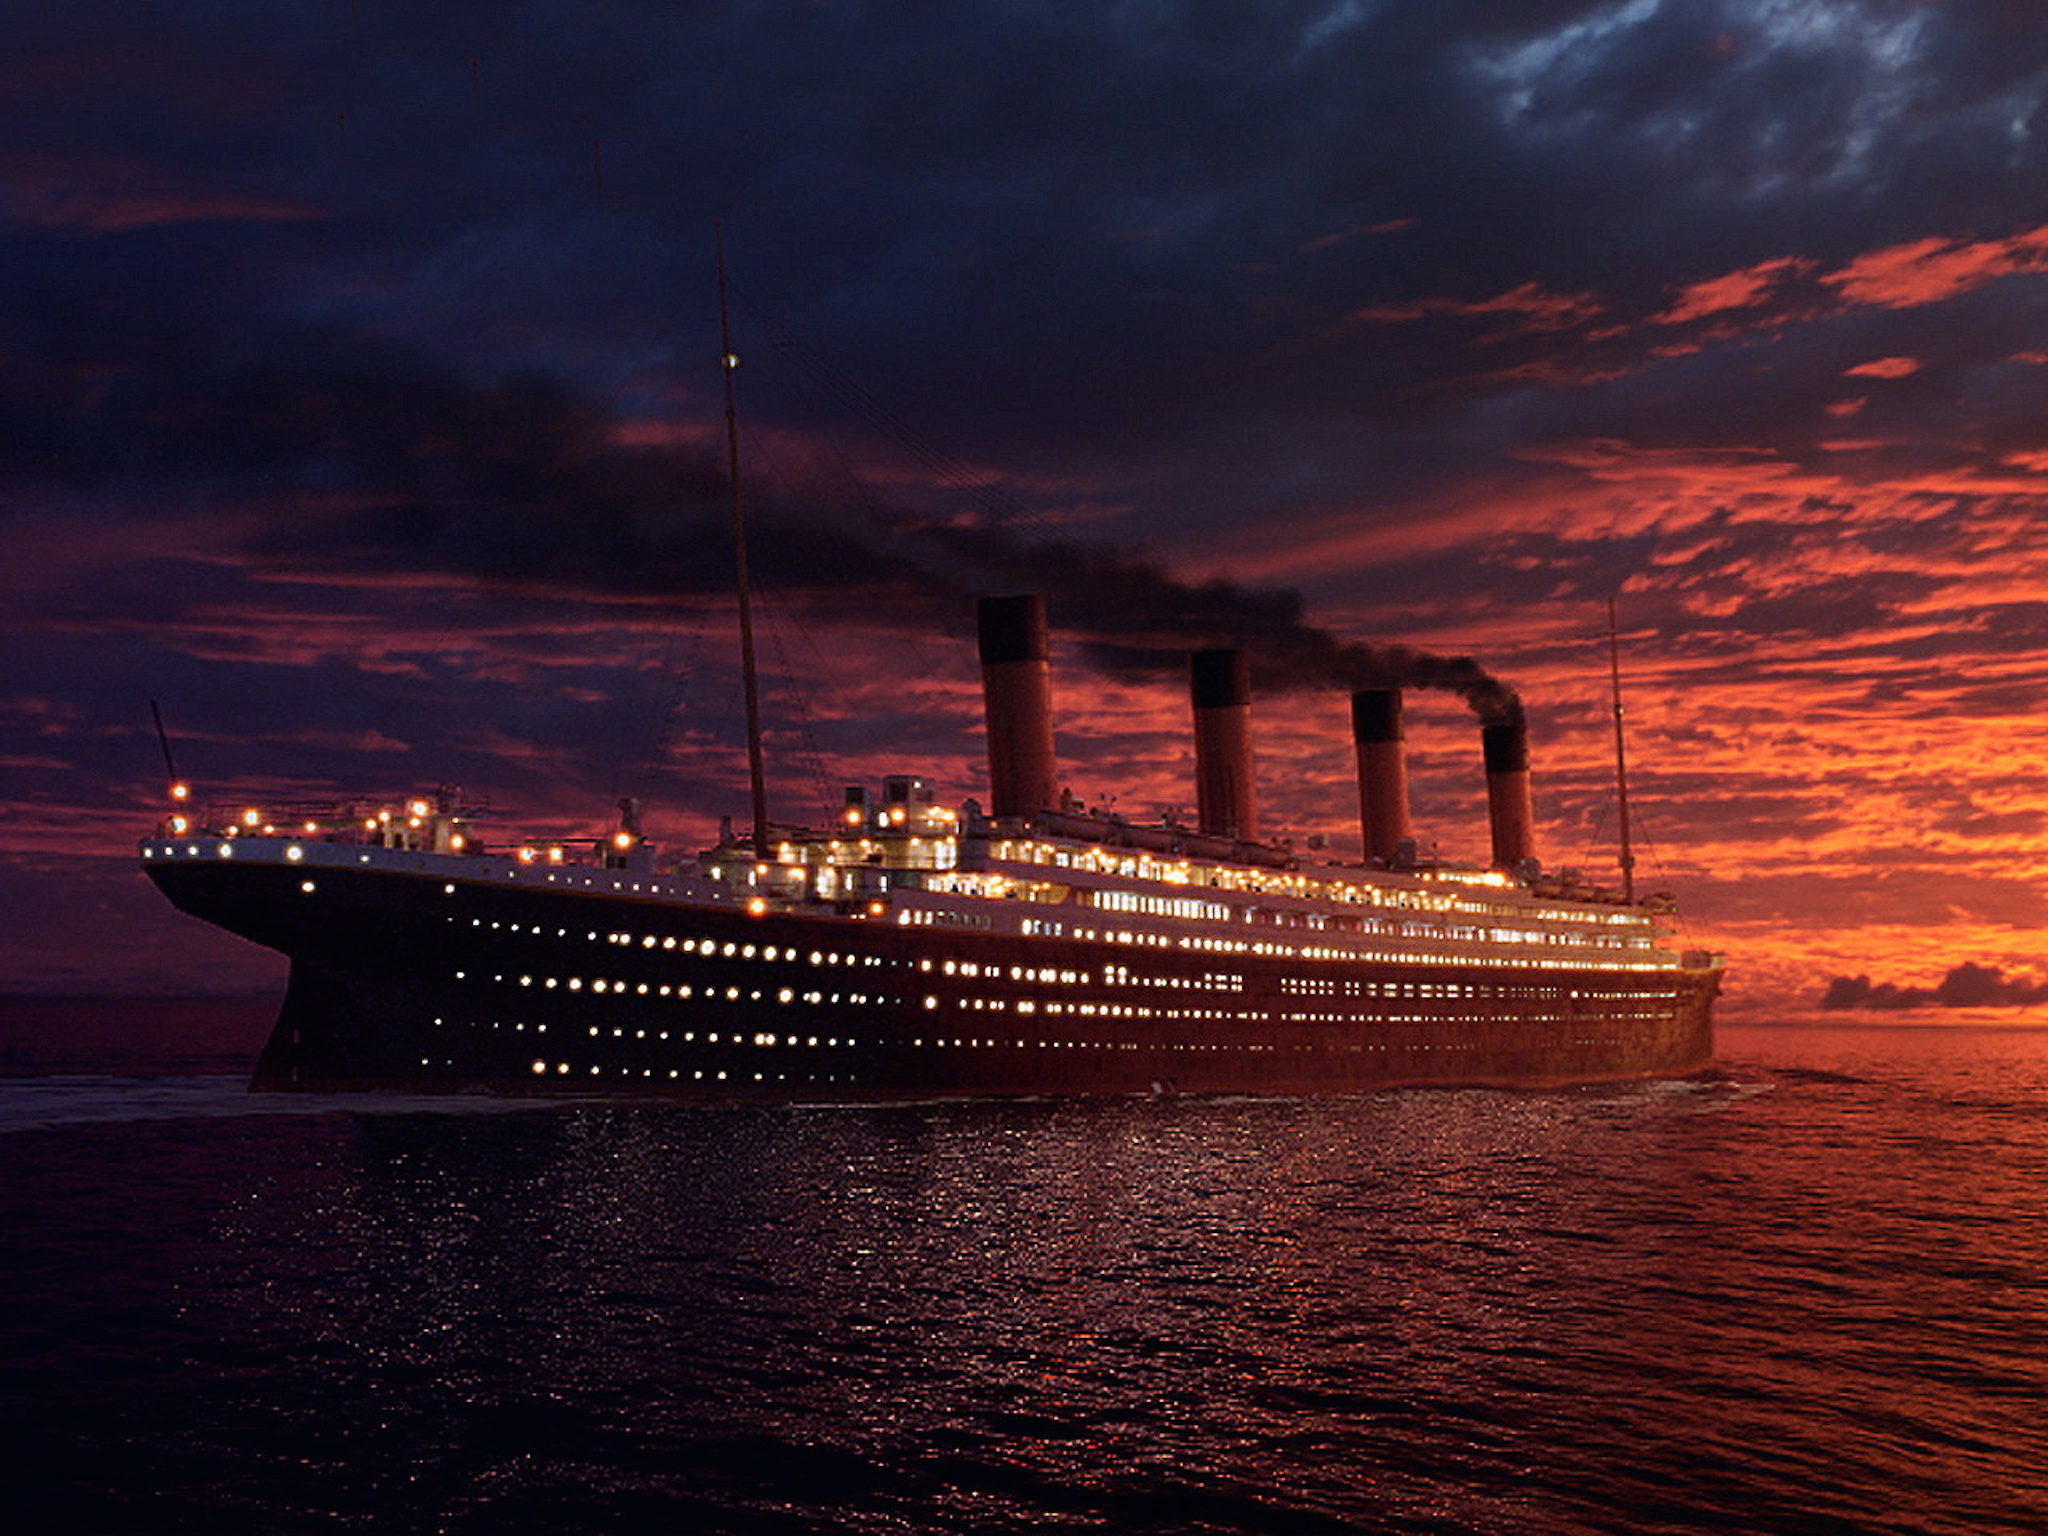

In [69]:
Image('...Path/', width=912)

In [68]:
X = Titan_Tr.iloc[:, 1:7].values
Y = Titan_Tr.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0)